# ONUR CAN
# MSc. Data Science NON-THESIS MASTER TERM PROJECT
# 0078627

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. DATASET AND FEATURES

* California Housing Dataset has been published US Census Bureau   which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California.

* The ML Applications attempted here aims to predict median house values in California using the provided dataset. Implemented different types Regression models should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

* California Housing Dataset is an open source dataset. It can be reached from popular data science websites such as Kaggle with the link https://www.kaggle.com/datasets/shibumohapatra/house-price.



In [41]:
path = "California House Dataset.csv"
house_data = pd.read_csv(path)
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


We have 10 metrics including target variable **median_house_value**. Detailed explanation of each variable is provided below:

*   **Longitude-Latitude** : geographic location information are usefull to 
understand if any of the regions are much more valuable than the other sections. This will be analyzed further during EDA.
*   **Age**: House age can be important estimator and expected to negatively correlated with the price. This will be analyzed further with correlation analysis.
*   **Household	& total_rooms &	total_bedrooms & population** :	features represent total values for each district. We will be combining these to represent unique district related features such as pop / household. These will be more representative of given district. Also it should be noted that total number of bedrooms featuere had missing values that will be imputated with the median value for each district.
*   **Median income** : District median income may be the most important feature that can effect the house prices. It is scaled between 0.5 and 15.0 in the preprocessed dataset. The original scale value will be further transformed in the preprocessing steps.
*   **Ocean proximity** :  is a  categorical feature that will be categorically encoded for each unique value in order to feed the feature into our ML models.
*   **Median house value** : is the target value.

In [42]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [43]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2. EDA

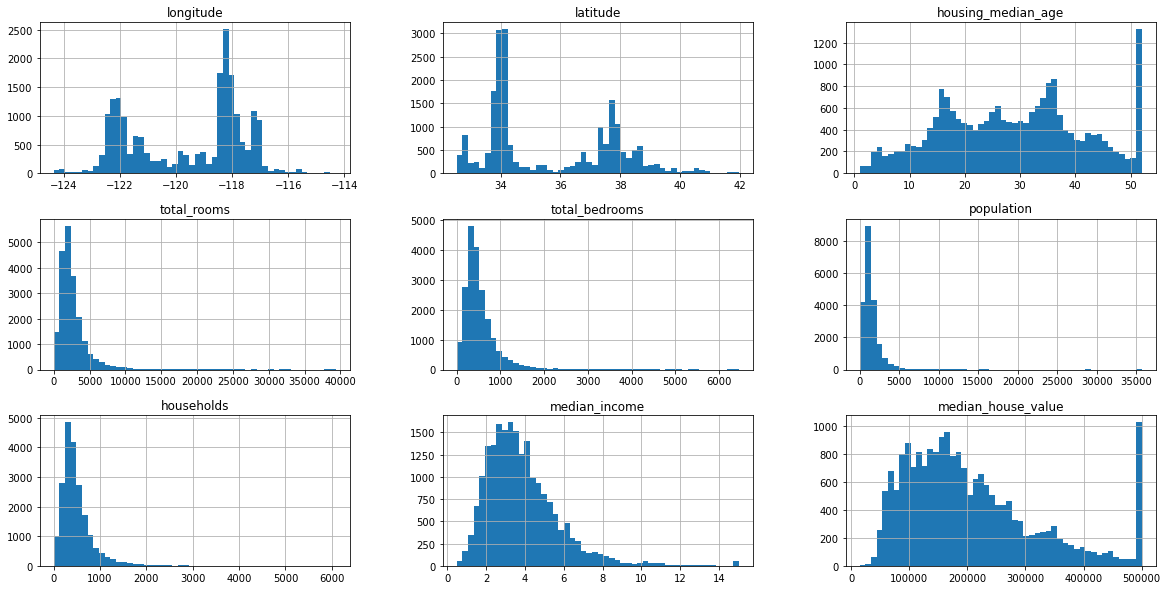

In [44]:
house_data.hist(bins= 50, figsize = (20,10))
plt.show()

1. First information to notice from histograms is that attributes have different scales which makes min-max or standart normalization necessary otherwise our estimator can put to much weight into these attributes.

2. Second insight is that most of the features look like normally distributed with skewed formation. We need to take this into consideration during modeling.

3. As discussed in the dataset part, median income feature already pre-processed between 0 and 15.

4. Our target value and housing age capped at 500000 and 50 upper bound values respectively. This can be problem since this approach was not followed the rest the features.

5. Longtitude and Latitude information can be used during mapping of california region. These map information can be found below with real map information of california region.

6. Target Variable median_house_value has confidence interval of 206855 +- 20640 that is (186215,227495). We need to consider **206855 mean median house value price** while evaluating the error of our models.

### 2.1 Longtitude and Latitude Map Information

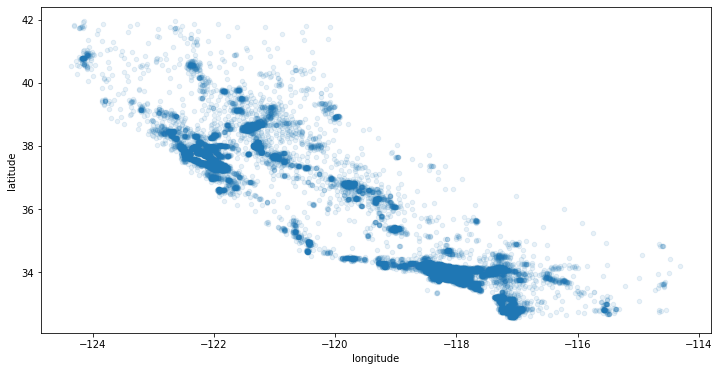

In [45]:
house_data.plot(kind = "scatter", x= "longitude", y= 'latitude', alpha = 0.1 , figsize = (12,6))
plt.show()

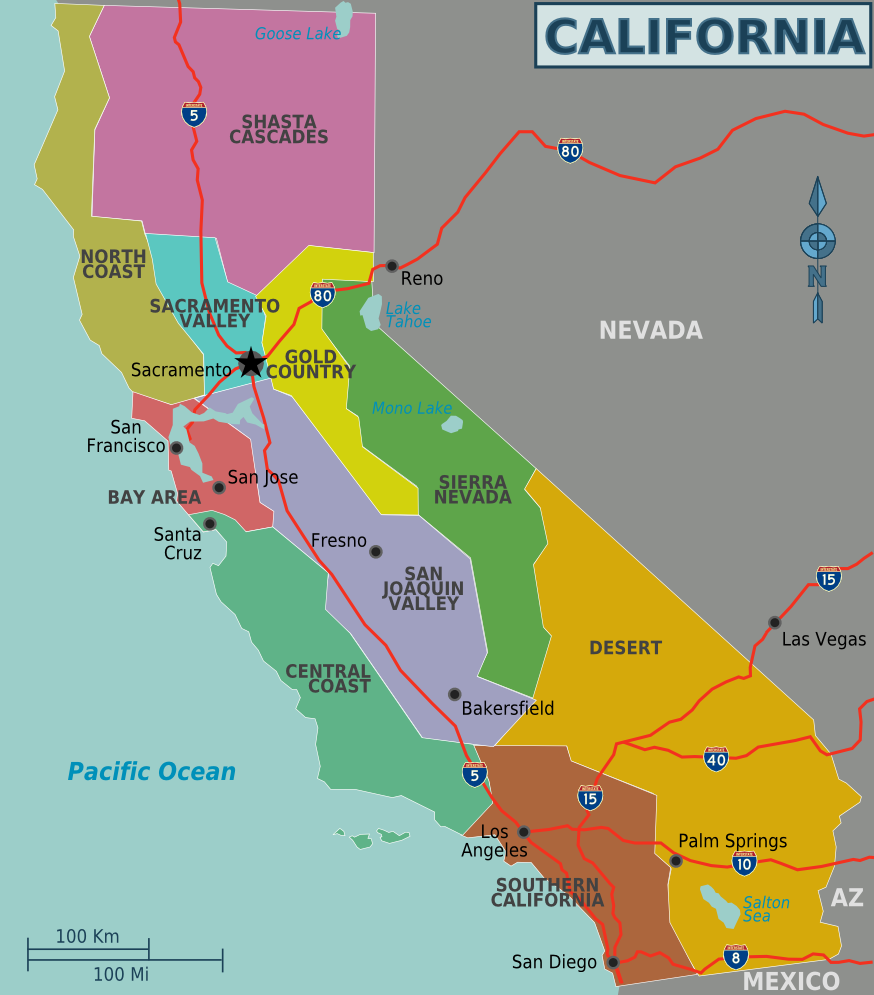

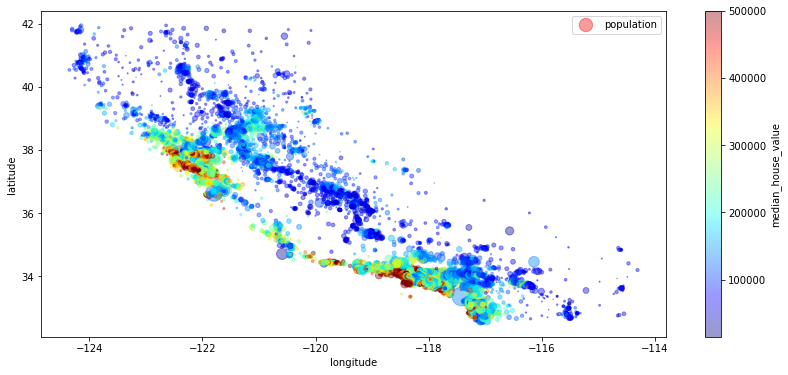

In [46]:
house_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=house_data["population"]/100, label="population", figsize=(14,6),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

**It can be observed from heat map and real california region, the high density in the Bay Area, Los Angelos, San Diego and in the Central Valley around Sacramento and Fresno show the most expensive regions in the  California.**

### 2.2. Correlation Analysis

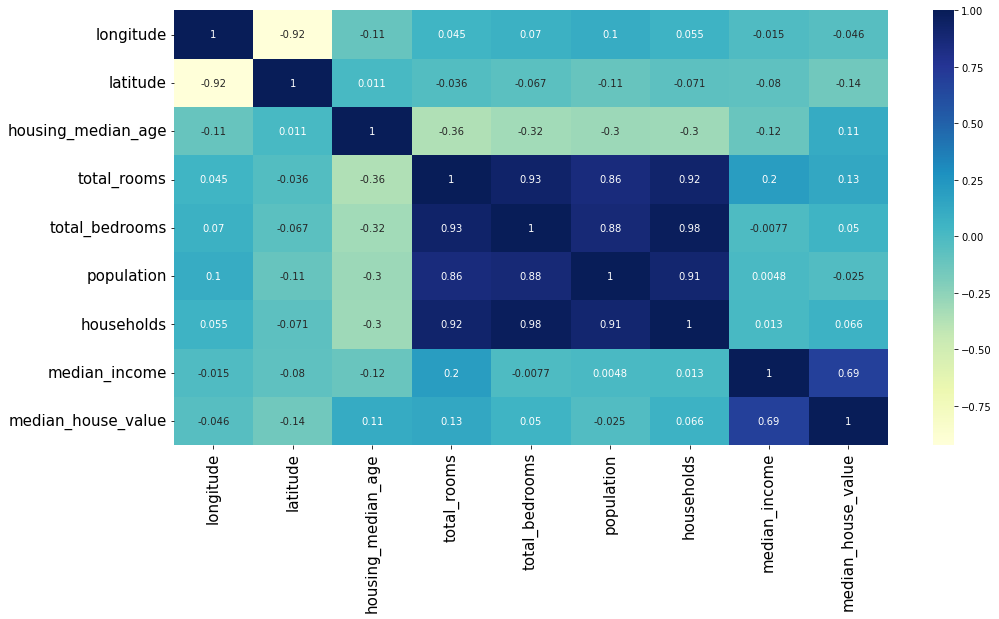

In [47]:
plt.figure(figsize = (16,8))
sns.heatmap(house_data.corr(), cmap="YlGnBu", annot=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [48]:
house_data["bedrooms_per_room"] = house_data["total_bedrooms"]/house_data["total_rooms"]
house_data.corr()["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_per_room    -0.255880
Name: median_house_value, dtype: float64

* From the correlation plot we can see that median income of the district has a positive correlation with the median house value. This outcome was expected since as median income grows in a district, the property value of the houses  in these areas should also grow.

* One additional observation can be reached from ratio of bedroom number to number of normal.  Our new variable bedroom_per_room has a stronger negative correlation with the median house price.

* Age variable was expecte to negatively correlated with the price of the houses. However the correlation value is close to 0.

* All other features have close to 0 correlations.

## 3. Train - Test Split

* We have utilized the train - test split method of sklearn library. Since we have large enough dataset random shuffle split for train-test split is sufficient.

In [49]:
house_target = house_data["median_house_value"]
house_features = house_data.copy().drop("median_house_value", axis= 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(house_features, house_target, shuffle = True, test_size= 0.2, random_state = 1234)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(16512, 10) (16512,) (4128, 10) (4128,)


## 4. DATA PREPROCESSING

* Most of the machine learning algorithms do not work with missing values and also require numeric input data. As we have discussed in the dataset introduction. total_bedrooms and our additional variable bedrooms_per_room has missing values. Therefore we will implement median imputation strategy since all of the dataset also follows the median approach. Additionally we will only impute training set in order to not influence test data.

### 4.1 IMPUTATION

In [50]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(missing_values = np.nan , strategy = "median")

In [51]:
house_data[house_data.isnull().any(axis = 1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedrooms_per_room
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900,NaN
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100,NaN
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400,NaN
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100,NaN
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400,NaN


In [52]:
median_imputer.fit(X_train[["total_bedrooms","bedrooms_per_room"]])
X_train[["total_bedrooms","bedrooms_per_room"]] = median_imputer.transform(X_train[["total_bedrooms","bedrooms_per_room"]])

In [53]:
X_train.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
bedrooms_per_room     0
dtype: int64

### 4.2. CATEGORICAL ENCODE

* Ocean proximity feature is a categorical variable that we need to apply one-hot-encode transformation. In order to do this, get_dummies is a convient method provided by the pandas library. We also defined fit_transform_dummies function for future use.

In [54]:
cat_features_train = pd.get_dummies(X_train["ocean_proximity"])
X_train[cat_features_train.columns] = cat_features_train
X_train.drop("ocean_proximity", axis=1, inplace = True)

cat_features_test = pd.get_dummies(X_test["ocean_proximity"])
X_test[cat_features_test.columns] = cat_features_test
X_test.drop("ocean_proximity", axis=1, inplace = True)

def fit_transform_dummies(df, column):
  cat_features = pd.get_dummies(df[column])
  df[cat_features.columns] = cat_features
  return df.drop("ocean_proximity", axis=1)

### 4.3. FEATURE SCALING PIPELINE

* Most of the features that we have has close to normal distribution therefore standardization method of sklearn is applied to each to convert different numeric data input into standart normal form.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("std_scaler", StandardScaler())
])

X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17595,-121.89,37.31,40,1844,340.0,719,305,3.3682,0.184382,1,0,0,0,0
6073,-117.85,34.07,32,761,101.0,295,95,11.1077,0.132720,1,0,0,0,0
6251,-117.97,34.04,32,1507,295.0,1326,324,4.1190,0.195753,1,0,0,0,0
3161,-118.85,35.23,26,1639,352.0,1222,395,1.7656,0.214765,0,1,0,0,0
1887,-119.98,38.92,27,2682,606.0,1010,399,3.1500,0.225951,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,-118.23,33.76,21,49,14.0,29,16,5.0000,0.285714,0,0,0,0,1
9449,-119.85,37.39,14,2744,555.0,1153,474,2.7530,0.202259,0,1,0,0,0
8471,-118.32,33.91,33,1729,396.0,1073,344,4.2083,0.229034,1,0,0,0,0
17048,-122.27,37.47,44,3022,473.0,1235,477,6.7058,0.156519,0,0,0,0,1


In [56]:
scale_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'bedrooms_per_room']
X_train[scale_features] = num_pipeline.fit_transform(X_train[scale_features])
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17595,-1.163240,0.787791,0.907187,-0.364767,-0.472048,-0.625067,-0.510375,-0.266036,-0.493014,1,0,0,0,0
6073,0.856764,-0.729221,0.269542,-0.871166,-1.051257,-1.002272,-1.067244,3.790866,-1.385540,1,0,0,0,0
6251,0.796764,-0.743267,0.269542,-0.522345,-0.581104,-0.085057,-0.459991,0.127519,-0.296558,1,0,0,0,0
3161,0.356763,-0.186093,-0.208691,-0.460623,-0.442966,-0.177579,-0.271716,-1.106089,0.031899,0,1,0,0,0
1887,-0.208238,1.541615,-0.128986,0.027072,0.172596,-0.366182,-0.261109,-0.380413,0.225147,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,0.666764,-0.874367,-0.607220,-1.204090,-1.262099,-1.238916,-1.276733,0.589323,1.257642,0,0,0,0,1
9449,-0.143238,0.825248,-1.165159,0.056063,0.048999,-0.238964,-0.062228,-0.588513,-0.184153,0,1,0,0,0
8471,0.621764,-0.804135,0.349248,-0.418540,-0.336333,-0.310135,-0.406956,0.174328,0.278416,1,0,0,0,0
17048,-1.353240,0.862705,1.226010,0.186053,-0.149726,-0.166014,-0.054272,1.483472,-0.974384,0,0,0,0,1


## 5. MODEL TRAINING

* Several different machine learning applications will be applied in following sections. The performance metric will be root mean squared error (RMSE)

### 5.1- Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)

lr_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
lr_error

67916.17929195182

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lr_scored = np.sqrt(-scores)

print(np.sort(lr_scored))
print("%0.2f error with a standard deviation of %0.2f" % (lr_scored.mean(), lr_scored.std()))

[65428.06175321 65723.344272   65826.09583503 67523.22888845
 67583.37871295 67593.81445014 67756.747309   68610.70690297
 70433.81319895 74160.77054906]
68064.00 error with a standard deviation of 2477.08


**This is clearly not a great score.  median_housing_values has a mean of 206855, a prediction error of 67916 is not very satisfying and also an example of a model underfitting the data. This either means that the features do not provide enough information to make proper predictions, or that the model is just not powerful enough.**

### 5.2- Lasso and Ridge Regression with Grid Search

In [59]:
# Basic Model
ridge_model = Ridge(alpha= 0.1)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)

ridge_model = np.sqrt(mean_squared_error(y_train, y_train_pred))
ridge_model

67916.1934504121

#### 5.2.1 RIDGE

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"alpha": [0.1, 1, 10, 100] }]
ridge_model = Ridge()

ridge_grid = GridSearchCV(ridge_model, param_grid, scoring="neg_mean_squared_error", cv=10)

ridge_grid.fit(X_train, y_train)

print("Test Alpha Values:", [0.1, 1, 10, 100])
print("Rank:", ridge_grid.cv_results_["rank_test_score"])
print("Mean:", np.sqrt(-1 * ridge_grid.cv_results_["mean_test_score"]))
print(ridge_grid.best_estimator_)

Test Alpha Values: [0.1, 1, 10, 100]
Rank: [1 2 3 4]
Mean: [68108.8848332  68108.96689916 68126.34222152 68163.94029249]
Ridge(alpha=0.1)


#### 5.2.2 LASSO

In [61]:
import warnings
warnings.simplefilter("ignore")   # to avoid convergence error in lasso regression

param_grid = [{"alpha": [0.1, 1, 10, 100] }]
lasso_model = Lasso(max_iter = 1000)

lasso_grid = GridSearchCV(lasso_model, param_grid, scoring="neg_mean_squared_error", cv=10)

lasso_grid.fit(X_train, y_train)

print("Test Alpha Values:", [0.1, 1, 10, 100])
print("Rank:", lasso_grid.cv_results_["rank_test_score"])
print("Mean:", np.sqrt(-1 * lasso_grid.cv_results_["mean_test_score"]))
print(lasso_grid.best_estimator_)

Test Alpha Values: [0.1, 1, 10, 100]
Rank: [2 1 3 4]
Mean: [68109.05149175 68108.96830911 68111.60688618 68152.37735377]
Lasso(alpha=1)


**After the poor performance provided by the Regression model we can switch our attention to different ML Applications.**

### 5.3.Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor(random_state= 1234)
Tree.fit(X_train, y_train)

y_train_pred = Tree.predict(X_train)

tree_error = np.sqrt(mean_squared_error(y_train, y_train_pred))
tree_error

0.0

**Regressor Tree gives no error at all, which means that we strongly overfitted our data. This outcome was expected since if we dont set the limiting hyper parameters our tree will keep splitting further and further.**

In [63]:
scores = cross_val_score(Tree, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

tree_scored = np.sqrt(-scores)
print(np.sort(tree_scored))
print("%0.2f accuracy with a standard deviation of %0.2f" % (tree_scored.mean(), tree_scored.std()))


[65585.38739419 67137.75092893 68439.06070693 68804.89622694
 68888.53782136 69228.03395358 69819.86651596 70620.22523003
 71002.34280973 72743.26264593]
69226.94 accuracy with a standard deviation of 1906.53


**Regressor Tree has performed worse than our previous linear regression model. Note that cross validation not only gives you an estimate of your models performance, but also of how precise this estimate is (standard deviation).**

* Linear Regression, Ridge, Lasso and Decision Tree Regressor did not provide successfull results in terms of Error mean and std.

* Random Forest works by training many Decision Trees on random subsets of the features and then it averages their predictions. Building a model on top of other models is called Essemble Learning and often pushes Machine Learning algorithms further.

### 5.4. Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=1234)
forest_reg.fit(X_train, y_train)

y_train_pred = forest_reg.predict(X_train)

forest_mse = mean_squared_error(y_train, y_train_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18441.839086444033

In [65]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_reg = np.sqrt(-scores)

print(np.sort(forest_reg))
print("%0.2f accuracy with a standard deviation of %0.2f" % (forest_reg.mean(), forest_reg.std()))

[46572.46965055 47369.67762537 48207.38429681 48793.92021592
 49343.04762976 50247.49807445 50301.37240466 50573.33733707
 50976.62242736 51985.24390837]
49437.06 accuracy with a standard deviation of 1611.61


**Random Forest predictor has improved our our error from almost 70.000 to 50.000 which is a significant increase. Lets try Random Forest Model with Grid Search to optimize Hyperparameters**

In [66]:
param_grid = [
    {'n_estimators': [10, 50, 100], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [50, 100], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
forest_grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error')
forest_grid_search.fit(X_train, y_train)
forest_grid_search

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [10, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [50, 100]}],
             scoring='neg_mean_squared_error')

In [67]:
print("Rank:", forest_grid_search.cv_results_["rank_test_score"])
print("Mean:", np.sqrt(-1 * forest_grid_search.cv_results_["mean_test_score"]))
print(forest_grid_search.best_estimator_)
print(forest_grid_search.best_params_, " ", np.sqrt(-1 * forest_grid_search.cv_results_["mean_test_score"]).min())

Rank: [18 14 13 16  9  8 17 10  5 15  6  3 12 11  7  4  2  1]
Mean: [54676.41086989 51315.64951879 51007.31307669 51974.80777869
 49461.82244939 49250.56190314 52194.76973437 49520.49064732
 49008.98821665 51947.69020815 49057.43898759 48730.5764117
 50166.78162652 49958.18419366 49166.13980148 48770.83880929
 48409.40230844 48218.03753409]
RandomForestRegressor(bootstrap=False, max_features=4, random_state=42)
{'bootstrap': False, 'max_features': 4, 'n_estimators': 100}   48218.03753409115


**Random Forest Concluded in a 48.218 error mean. This result is significantly better than the previous options. We will also consider KNN and SVM Regressors in the following sections.**

### 5.5. Support Vector Regression

In [68]:
from sklearn import svm

SVR = svm.SVR()
SVR.fit(X_train, y_train)
y_train_pred = SVR.predict(X_train)

SVR_mse = mean_squared_error(y_train, y_train_pred)
SVR_rmse = np.sqrt(SVR_mse)
SVR_rmse

117930.90060794818

In [69]:
scores = cross_val_score(SVR, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
svr_reg = np.sqrt(-scores)

print(np.sort(svr_reg))
print("%0.2f accuracy with a standard deviation of %0.2f" % (svr_reg.mean(), svr_reg.std()))

[114226.47423596 115534.77522804 117416.38256645 117567.92466795
 117914.58731334 118046.70066688 118261.23559973 118732.48889443
 119896.07530076 121819.37741236]
117941.60 accuracy with a standard deviation of 1990.15


### 5.6. KNN Regressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors = 20

for trial in range(1, n_neighbors):
    n_neighbors = trial
    knn = KNeighborsRegressor(n_neighbors, weights="uniform")
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)

    knn_mse = mean_squared_error(y_train, y_train_pred)
    knn_rmse = np.sqrt(knn_mse)
    print("Neighbor Count {} ".format(n_neighbors), knn_rmse)


Neighbor Count 1  0.0
Neighbor Count 2  37958.7766218483
Neighbor Count 3  43889.690613429135
Neighbor Count 4  47085.595527981764
Neighbor Count 5  49193.4162835294
Neighbor Count 6  50491.381002350216
Neighbor Count 7  51582.13221883749
Neighbor Count 8  52475.74029423551
Neighbor Count 9  53242.34283403258
Neighbor Count 10  53919.33331423359
Neighbor Count 11  54490.15970609772
Neighbor Count 12  54966.256585318944
Neighbor Count 13  55388.83835630208
Neighbor Count 14  55679.50129033297
Neighbor Count 15  56033.568242368245
Neighbor Count 16  56396.890127349296
Neighbor Count 17  56708.97341627972
Neighbor Count 18  56971.44135141735
Neighbor Count 19  57209.62166322153


### 5.7. MLP Regressor
#### 5.7.1. Sklearn MLP Regressor

In [71]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(32, 16), activation = "relu", solver = "adam", random_state = 1234, max_iter = 500)
mlp_reg.fit(X_train, y_train)
y_train_pred = mlp_reg.predict(X_train)

mlp_reg_mse = mean_squared_error(y_train, y_train_pred)
mlp_reg_rmse = np.sqrt(mlp_reg_mse)
mlp_reg_rmse

64672.35371125252

#### 5.7.2. TensorFlow Keras MLP

In [72]:
import tensorflow as tf
from tensorflow import keras

#ABSTRACT MODEL
mlp_model = keras.models.Sequential([
    keras.layers.Input(shape = (X_train.shape[1],)),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1)
])

mlp_model.summary()

#COMPILED MODEL
mlp_model.compile(loss = "mse", optimizer = "adam")

#LEARNED MODEL
mlp_history = mlp_model.fit(X_train, y_train,
                            epochs = 50,
                            batch_size = 16,
                            verbose = 0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                480       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


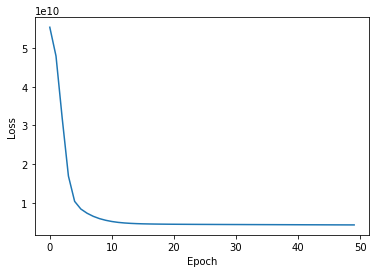

In [73]:
plt.plot(mlp_history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [74]:
mlp_keras_mse = mean_squared_error(y_train, y_train_pred)
mlp_keras_rmse = np.sqrt(mlp_keras_mse)
mlp_keras_rmse

64672.35371125252

## 8. MODEL COMPARISON & CONCLUSION
### 8.1. Training Analysis

In [75]:
models = {"linear": lr_error, 
          "ridge": np.sqrt(-1 * ridge_grid.cv_results_["mean_test_score"]).mean(),
          "lasso": np.sqrt(-1 * lasso_grid.cv_results_["mean_test_score"]).mean(),
          "decision tree": tree_scored.mean(),
          "random forest": np.sqrt(-1 * forest_grid_search.cv_results_["mean_test_score"].mean()),
          "svr": svr_reg.mean(),
          "KNN": knn_rmse,
          "sklearn_mlp_reg": mlp_reg_rmse,
          "keras_mlp_reg": mlp_keras_rmse}



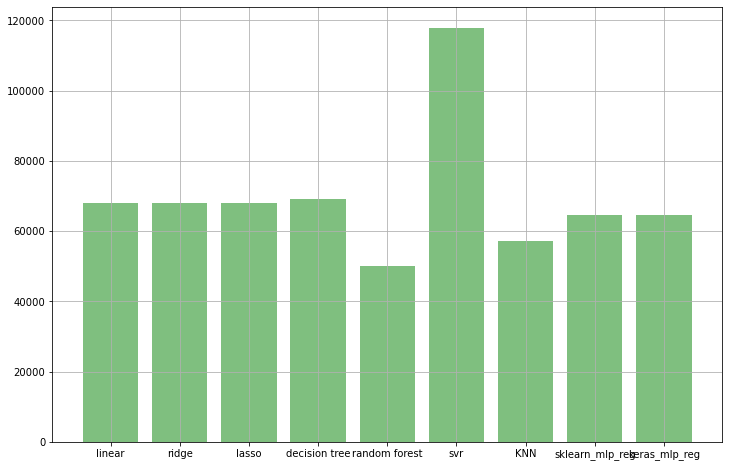

In [76]:
values = np.array(list(models.values()))
plt.figure(figsize = (12,8))
plt.bar(np.arange(len(models)), values, color = "green", alpha=0.5)
plt.xticks(np.arange(len(models)), models.keys())
plt.grid()
plt.show()

### 8.2 Test Analysis

In [77]:
X_test[scale_features] = num_pipeline.fit_transform(X_test[scale_features])
X_test["ISLAND"] = np.zeros(shape = y_test.shape[0])
#OLS
y_test_pred = lr_model.predict(X_test)
lr_error_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#RIDGE
y_test_pred = ridge_grid.predict(X_test)
ridge_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#LASSO
y_test_pred = lasso_grid.predict(X_test)
lasso_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#DECISION TREE
y_test_pred = Tree.predict(X_test)
tree_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#RANDOM FOREST
y_test_pred = forest_grid_search.predict(X_test)
forest_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#SVR
y_test_pred = SVR.predict(X_test)
SVR_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#KNN
y_test_pred = knn.predict(X_test)
knn_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#SKlearn MLP_REG
y_test_pred = mlp_reg.predict(X_test)
mlp_reg_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#KERAS MLP_REG
y_test_pred = mlp_model.predict(X_test)
keras_mlp_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

test_models = {"linear": lr_error_test, 
          "ridge": ridge_test,
          "lasso": lasso_test,
          "decision tree": tree_test,
          "random forest": forest_test,
          "svr": SVR_test,
          "KNN": knn_test,
          "sklearn_mlp_reg": mlp_reg_test,
          "keras_mlp_reg": keras_mlp_test}

129/129 [==============================] - 0s 745us/step


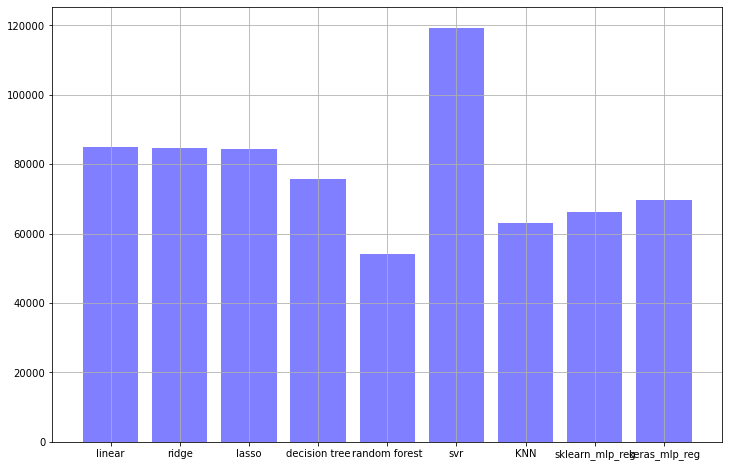

In [78]:
test_values = np.array(list(test_models.values()))
plt.figure(figsize = (12,8))
plt.bar(np.arange(len(test_models)), test_values, color = "blue", alpha=0.5)
plt.xticks(np.arange(len(test_models)), test_models.keys())
plt.grid()
plt.show()

## 9. Conclusion
**In this project, nine machine learning algorithms are used to develop housing price prediction models for estimating the future house pricing of California Region. The results show that Random Forest model performs better than the rest of the machine learning algorithms both in terms of traning/validation performance and test performance. The real estate prices can be inﬂuenced by other macro-economic variables as discussed in the report. Hence by only focusing hard-features as in California Housing can lead to significant errors. For future analysis date-time information or macro-economic features at house sale time such as inflation and mortgage interest rate can also bu included in the data collection process.**